In [25]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

major_genres = ['pop','rock','country','alternative','punk','metal','rap','soul','jazz','reggae','electronic','other']

In [26]:
n = 1
filename = str(n) + '_gram_deviations.csv'
df = pd.read_csv(filename)

In [27]:
def plot_high_deviation_n_grams(deviation_df, sample_size_threshold = 0.1, how_many_to_plot = 10):
    # input: a dataframe with one row for a baseline, and one row per n_gram
    #        columns include n_gram, GENRE_abs_log_dev_ratio (for each major genre)
    # output: bar plots of the top n_grams, ranked by abs_log_dev_ratio
    df = copy.deepcopy(deviation_df)

    # drop all rows where the 'total' column doesn't meet the sample size threshold, which is sample_size_threshold times the baseline total value
    baseline_row_index = df.index[df['n_gram'] == 'baseline'][0]
    baseline_total = df.loc[baseline_row_index,'total']
    df = df[df.total >= baseline_total * sample_size_threshold]

    # drop the baseline row
    df = df[df.n_gram != 'baseline']
      
    # sort by max_abs_log_dev_ratio, descending so the big ones are at the top. Get those top rows.
    df = df.sort_values(by = 'max_abs_log_dev_ratio', ascending = False)
    how_many_to_plot = min(how_many_to_plot, len(df.index)) # don't try to plot more than all the rows
    top_rows = df.head(how_many_to_plot)
    
    for i in range(how_many_to_plot):
        row_i = df.iloc[i]
        height_data = [row_i[g + '_log_dev_ratio'] for g in major_genres]
        my_x = np.arange(len(major_genres))
        plt.figure(figsize = (20, 4))
        plt.bar(x = my_x,
                height = height_data)
        plt.xticks(my_x, major_genres, rotation = 45, ha = 'right')
        plt.title('Log deviations from baseline genre distribution for songs containing "' + row_i['n_gram'] + '" based on a filtered set of ' + str(row_i['total']) + ' out of ' + str(baseline_total) + ' songs')
        plt.show()

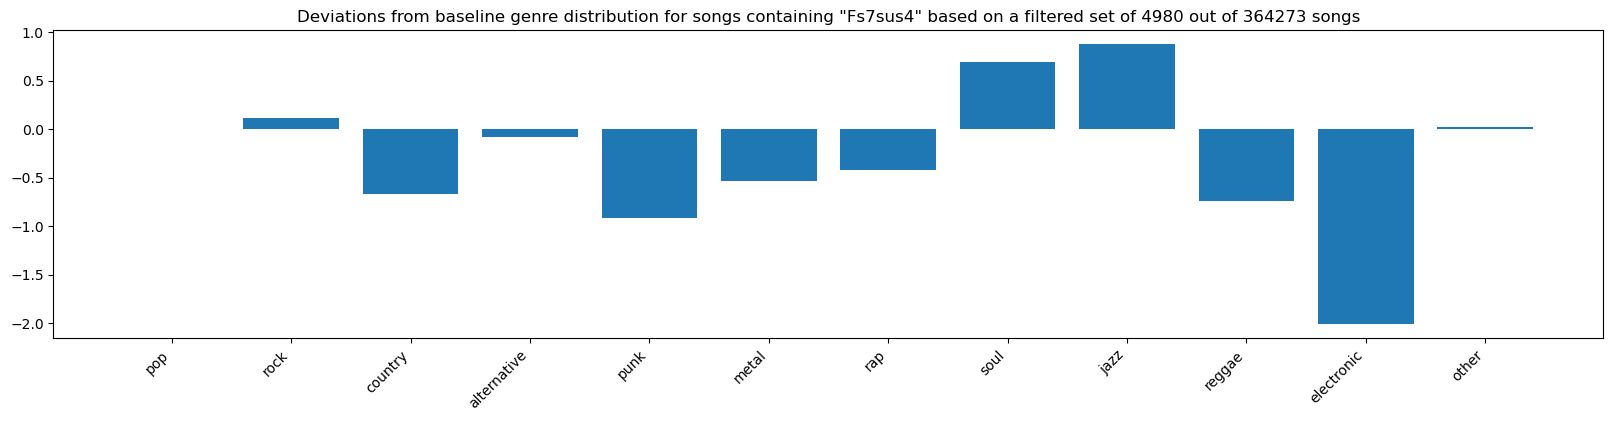

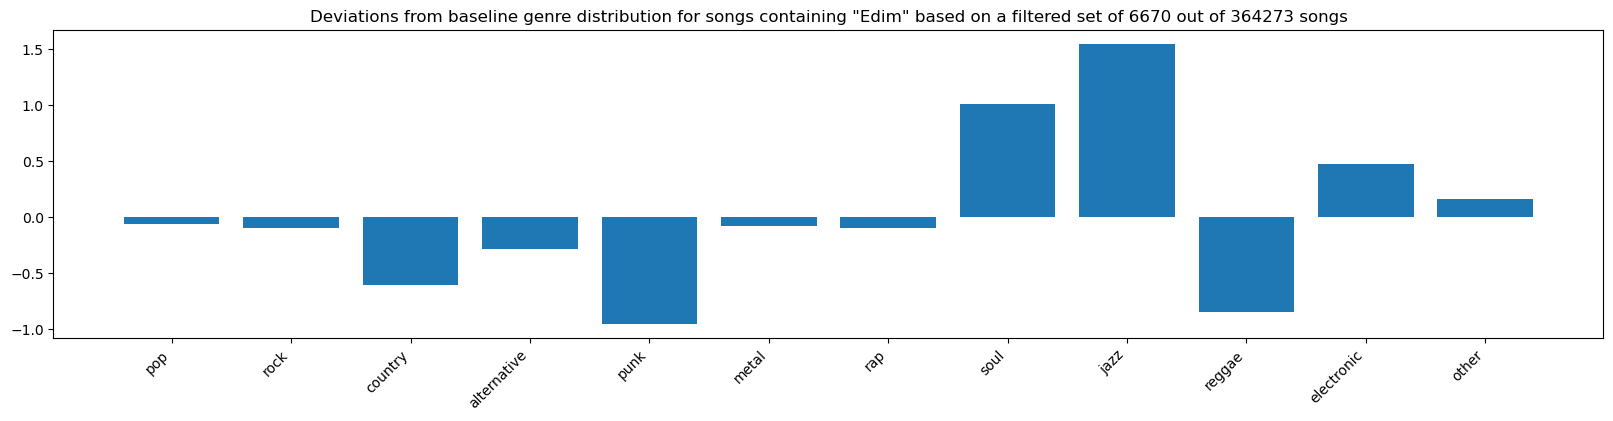

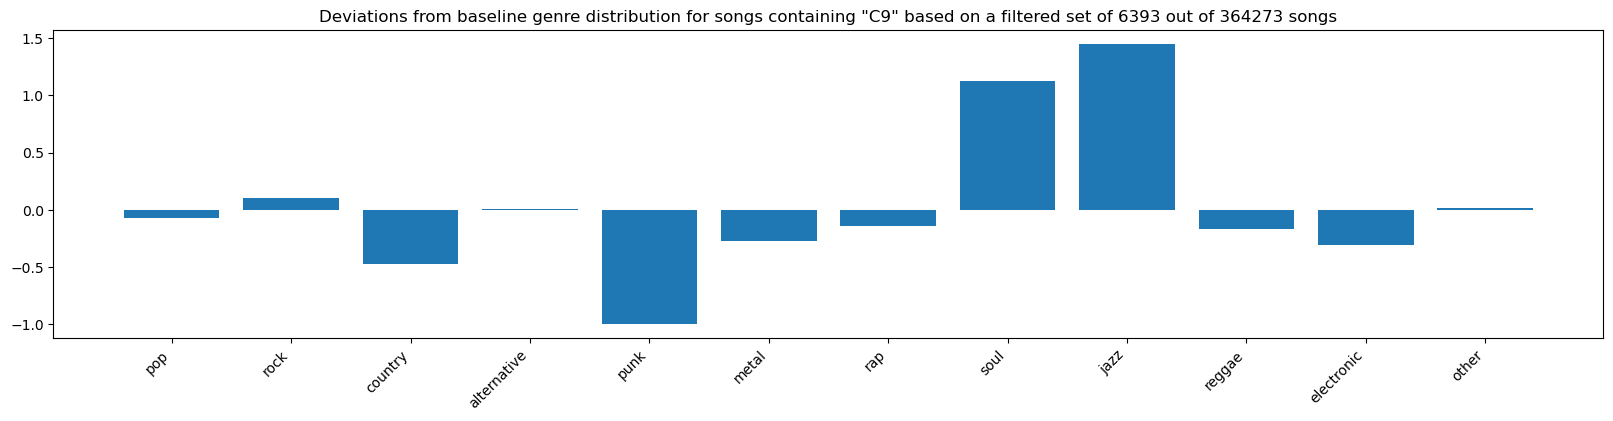

In [41]:
plot_high_deviation_n_grams(df, sample_size_threshold = 0.01, how_many_to_plot = 3)